**Chapter 10**. 컴포넌트, 요람에서 무덤까지: Components lifecycle 

- 클래스컴포넌트의 라이프 사이클
1. 마운트(처음 컴포넌트가 나타났을 때)
    - constructor
    - getDerivedStateFromProps
    - render
    - componentDidMount
2. 업데이트(컴포넌트 상태값이 바뀔 때)
    - getDerivedStateFromProps
    - shouldComponentUpdate
    - render
    - componentWillUpdate
    - componentDidUpdate
3. 언마운트(컴포넌트가 사라질 때)
    - componentWillUnmount

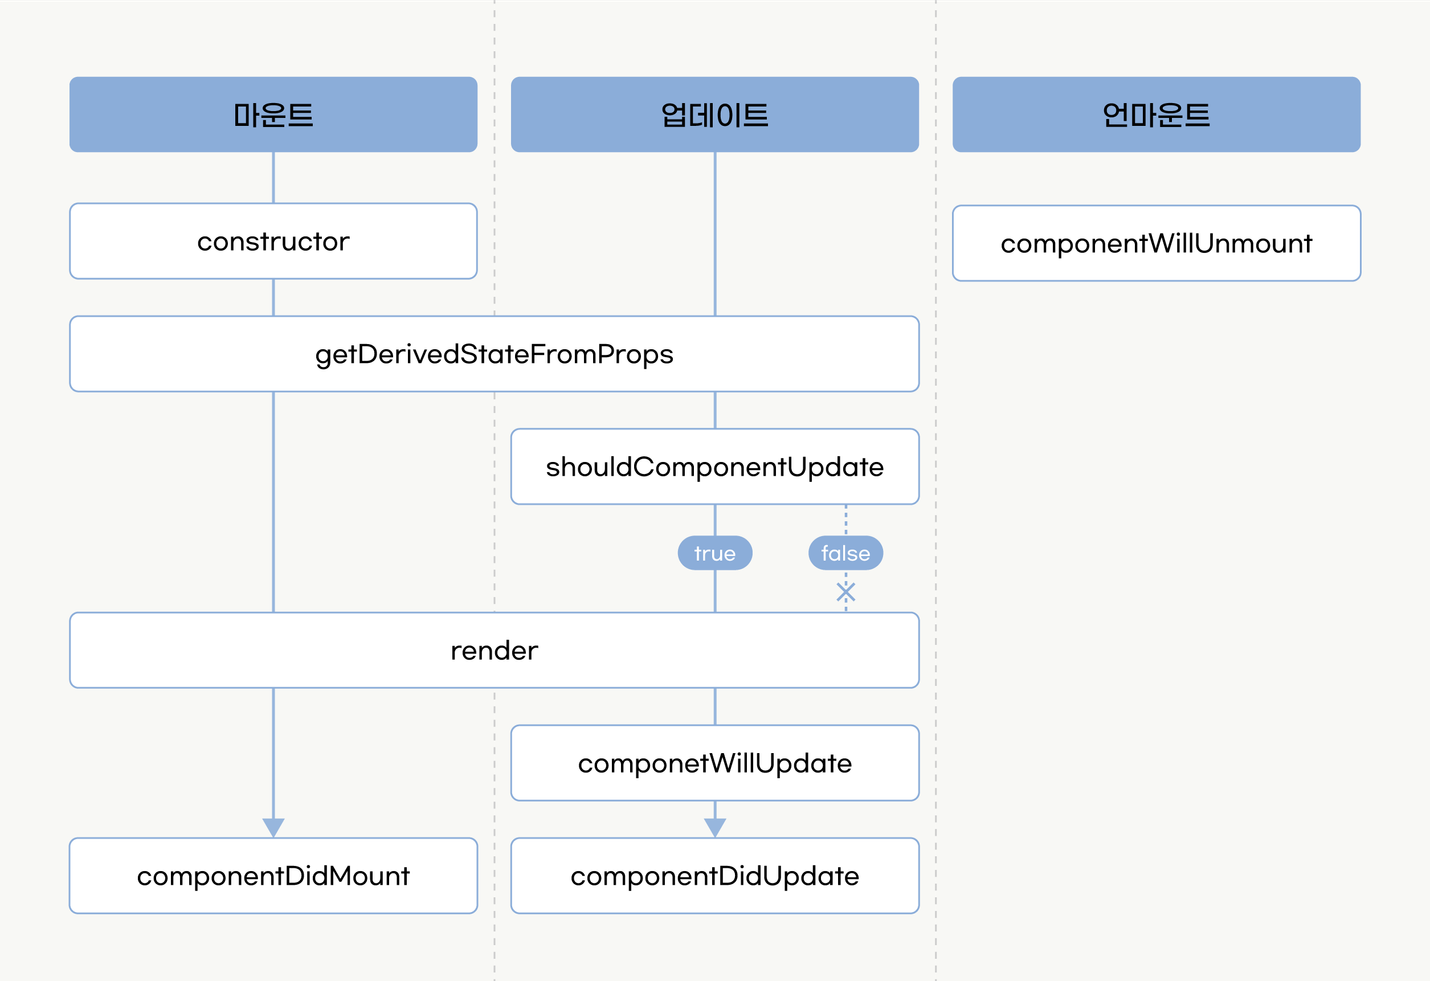



In [ ]:
import React, { Component } from "react";

class ClassComp extends Component {
  constructor(props) {
    super(props);
    this.state = { number: 0 };
  }

  componentWillMount() {
		//컴포넌트가 생성될 때 실행됩니다. (렌더링 되기 이전)
    console.log("componentWillMount");
  }

  componentDidMount() {
	//마운트가 완료되고 나서 실행됩니다. (렌더링 이후) 
    console.log("componentDidMount");
  }

  shouldComponentUpdate(nextProps, nextState) {
		//상태 업데이트가 되고 컴포넌트가 업데이트 되기 전(렌더되기 전) 실행
    console.log("shouldComponentUpdate");
    return true;
  }

  componentWillUpdate(nextProps, nextState) {
    console.log("componetWillUpdate");
  }

  componentDidUpdate(nextProps, nextState) {
    console.log("componentDidUpdate");
  }

	componentWillUnmount() {
    console.log("componentWillUnmount");
  }
  

  handleClick = () => {
    this.setState((state) => {
      return {
        number: state.number + 1,
      };
    });
  };

  render() {
    console.log("render");
    return (
      <div>
        <button onClick={this.handleClick}>Click me!</button>
        <span>{this.state.number}</span>
      </div>
    );
  }
}

class App extends Component {
  render() {
    return <ClassComp />;
  }
}

export default App

처음 페이지 열면, 
마운트 단계 : 컴포넌트 생성되는 것을 확인할 수 있음.

버튼을 클릭하면-> 넘버 증가, 상태 바뀜, 새로운 렌더링


훅 플로우

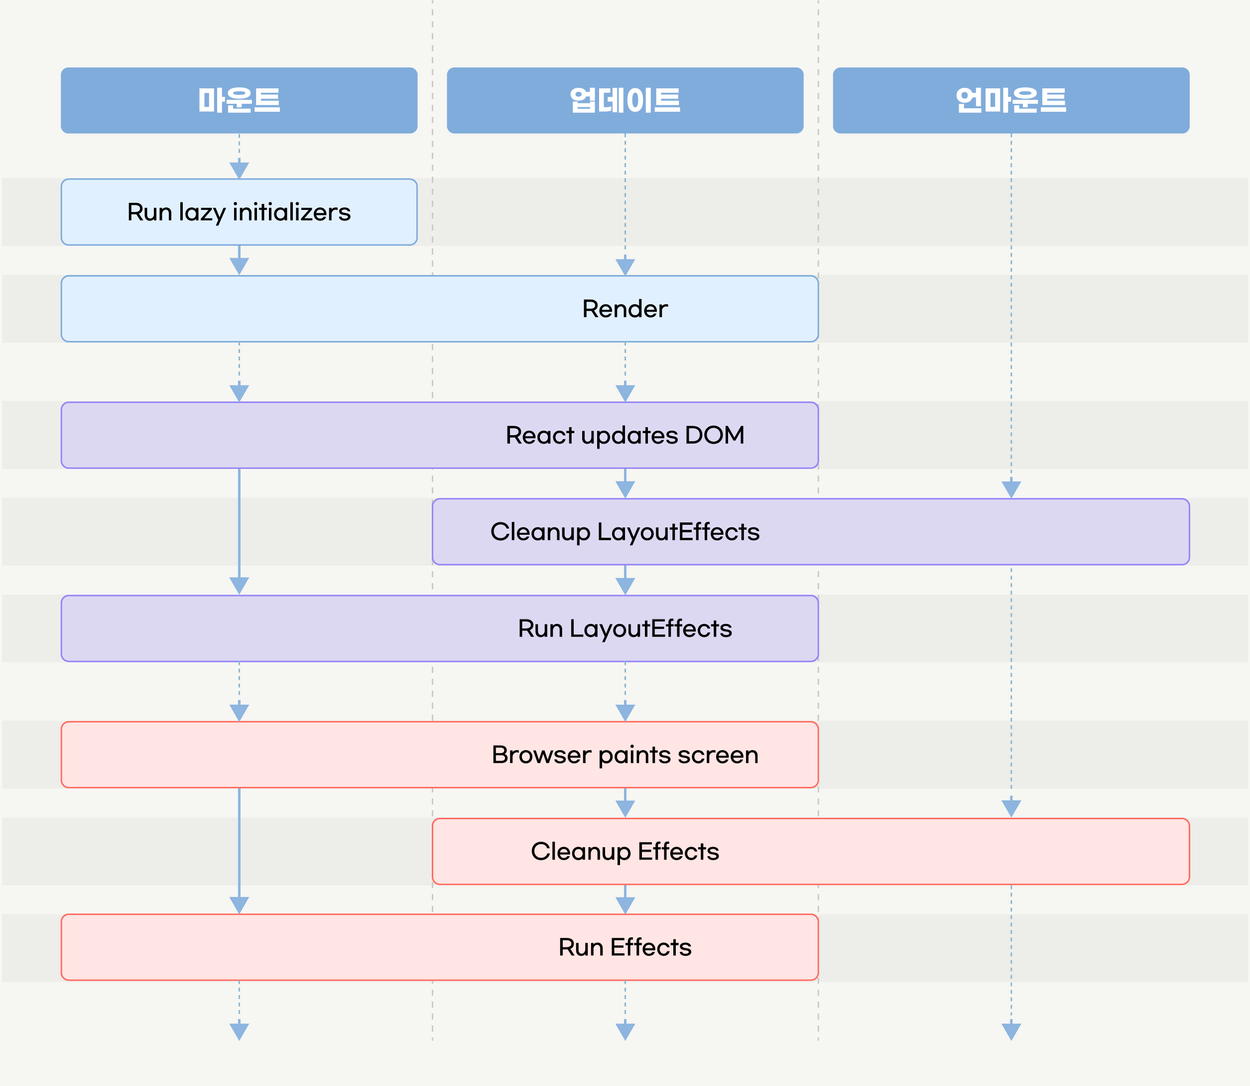

[마운트]
1. Run lazy initializers
2. render
3. React updates DOM
4. Run LayoutEffects
5. Browser paints screen
6. Run Effects

[업데이트]
1. render
2. React updates DOM
3. Cleanup LayoutEffects
4. Run LayoutEffects
5. Browser apints screen
6. Cleanup Effects
7. Run Effects

[언마운트]
1. Cleanup LayoutEffects
2. Cleanup Effects


훅 플로우 확인하기
1. 최초 마운트가 되었을 때,
앱컴포넌트를 마운트 시키고, 언마운트 시키기 위한 wrap컴포넌트를 만들었다.
업데이트 테스트를 위한 버튼 컴포넌트를 만들었다.

    예시의 페이지를 브라우저에 그렸을 때, 콘솔로그를 확인해 보면, useEffect, useLayoutEffect가 모두 실행되었다.

2. 업데이트가 되었을 때,
숫자 버튼-> 카운트 올라감, state바뀌면서 업데이트가 일어나는 것임

3. 언마운트가 되었을 때,
클린업 함수 실행됨.


**Chapter 11**. SPA가 화면을 전환하는 법: React router

리엑트 컴포넌츠 : 여러 div들을 하나로 묶음, 컴포넌트화 시킴. 
코드가 길어지는 것을 막은 것임.

react router : 

1. BrowserRouter 컴포넌트 :  UI와 URL 연결
2. Route 컴포넌트 : 현재 URL과 매칭된 UI를 렌더링 하는 역할
3. Routes 컴포넌트 : URL이 변경되면  <Routes> 는 모든 자식 <Route>
를 살펴보고 가장 알맞는 것을 매칭한다.

- 링크:  클릭하면 새로운 경로로 이동시킨다./ 주소만 바꿀 뿐 페이지를 새로불러오는 건 아니다.

- 중첩된 라우터 : 라우트 안에 라우트 형태로 작성하기

- element : 라우트에 컴포넌트를 전달할 때, 자식이나 컴포넌트를 사용하였는데, v6부터는 element를 이용해야함.



**Chapter 12**. 개발을 도와주는 기특한 React Hook

1. useEffect : state가 변할 때 마다 다른 효과를 원함.

In [ ]:
// 컴포넌트가 업데이트 될 때마다 매번 실행
useEffect(()=>{
	console.log('hello world');
})

// 마운트 단계에서만 1번 실행
useEffect(()=>{
	console.log('hello world');
}, [])

// 의존 배열의 원소들에 변화가 일어날 때마다 실행
useEffect(()=>{
	console.log('hello world');
}, [변수1, 변수2...])

2. useRef : 순수 자바스크립트 객체 생성.

리렌더링을 발생시키지 않고 값을 저장하거나 변경하고 싶을 때, 사용하는 것!
다시 렌더링 되어도 저장된 값은 변하지 않는다.

3. useMemo : 컴포넌트 성능 최적화에 사용됨.

메모이제이션 기법 사용 : 재귀함수, 피보나치 수열이 이에 해당.

특징 : 이전 값을 기억 한다.

렌더링 전에 저장된 것을 보여준다.


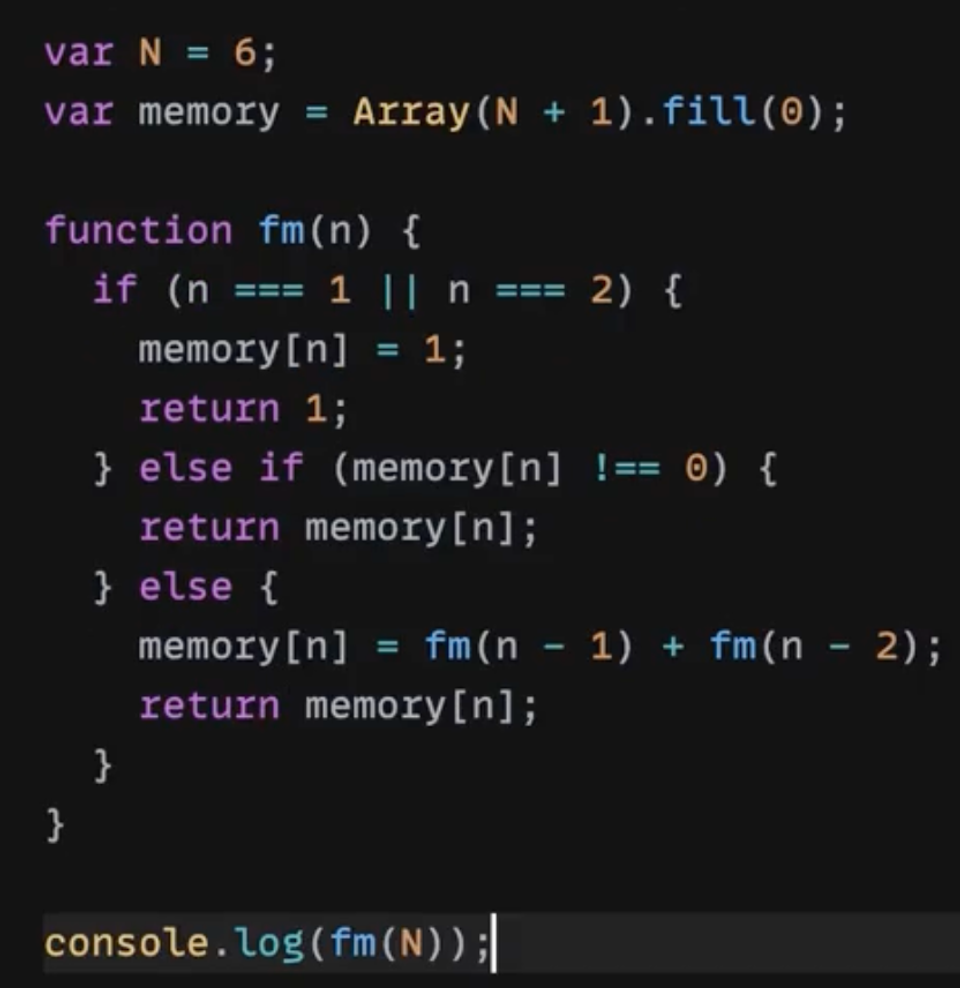


4. useContext

데이터를 넘겨줌.

1) props사용
2) useContext사용

In [ ]:
//useContext이용

import { useContext, createContext } from "react";

const UserInfo = createContext({ name: "gary", id: "garyIsFree" });

const App = () => {
  return (
    <HelloLicat/>
  );
};

const HelloLicat = () => {
  const { name, id } = useContext(UserInfo);
  return (
    <div>
      <h2>{name}</h2>
      <strong>{id}</strong>
    </div>
  );
};

export default App;